In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

### Data Load

In [2]:
train = pd.read_csv("train.csv")

print(train.shape)
train.head()

(8643, 13)


,category,comments,crawl_date,dislike,like,play_time,subscribers,tag,title,top_comment,upload_date,url,views
0,게임,"댓글 4,919개",2018.08.23,277,1.3만,0:14,151만,"['마인크래프트', 'Minecraft', '샌드박스 네트워크', '샌드박스', '...",마크판 거지키우기 업그레이드 *크리에이터* 키우기! - 마인크래프트 - [잠뜰],그동안 여러분이 잠뜰TV에서 가장 재밌게 본 영상은?!\n댓글에 많이 남겨주시고 좋...,게시일: 2018. 8. 17.,https://www.youtube.com/watch?v=azoDJNPRU7s&li...,"조회수 579,949회"
1,게임,"댓글 4,964개",2018.08.23,278,8.7천,0:15,236만,"['도티', '도티 마피아', '도티 머더', '마피아 머더', 'mafia', '...","직업 머더 ""곤충""능력 특집 (부제: 파브르와 저승벌레 팡수)",다음 컨셉은 아이스 크림 어떨까요?예를 들면스크류바:술래가 한 대 치면 술래를 5초...,게시일: 2018. 8. 20.,https://www.youtube.com/watch?v=-BnUuHgUK5Q&li...,"조회수 451,676회"
2,게임,"댓글 5,262개",2018.08.23,561,2.3만,6:47,246만,"['보겸', '보겸TV', 'bokyem', '도티', '롤', '오버워치', '원...",14번의”아디오스” ㄷ1지고싶으면 들이대봐 드루와,모듀 ㅂㅇㄹ ^_^* \nㅋㅋㅋ 역대 최대킬 ㅋㅋㅋ\n고마워 ^_^+ 가조쿠들 ㅋㅋ...,게시일: 2018. 8. 18.,https://www.youtube.com/watch?v=v0rDCGLcnpU&li...,"조회수 955,578회"
3,게임,"댓글 1,823개",2018.08.23,404,1.1천,13:00,23만,"['게임', '위닝', '위닝일레븐', '축구게임', '말이야와 게임들 축구게임',...",그때 눈물의 축구 게임 복수전! 과연 미니 고수 말이야 이길 수 있을까? (꿀잼) ...,"사랑하는 말랑이 여러분! 다음에는 말이야, 로기, 미니 축구팀을 댓글로 남겨주세요....",게시일: 2018. 8. 18.,https://www.youtube.com/watch?v=cK8Z2fz0iUI&li...,"조회수 191,211회"
4,게임,"댓글 1,159개",2018.08.23,36,3.4천,10:00,47만,"['카베', '모바일베그', '배그M', '카카오베그', '연다', '배틀그라운드'...",초보자도 여포로 만들어 줄 수 있는 총 조합! 제가 알려드리죠 ㅋㅋ (배틀그라운드-...,크흠...저런 총이 있어도 난 여포가 아니라 쥐포가 될것 같은데...\niny070...,게시일: 2018. 8. 21.,https://www.youtube.com/watch?v=bBbHq5sMqP0&li...,"조회수 162,253회"


### Upload_date
- 게시년, 월, 일

In [3]:
ls=list(train["upload_date"])

In [4]:
del_list = []
for i, s in enumerate(ls):
    if "시간시간" in s:
        print(s)
        del_list.append(i)
del_list

실시간 스트림: 14시간시간 전
실시간 스트림: 10시간시간 전
실시간 스트림: 12시간시간 전
실시간 스트림: 21시간시간 전
실시간 스트림: 18시간시간 전
실시간 스트림: 21시간시간 전
실시간 스트림: 17시간시간 전
실시간 스트림: 15시간시간 전
실시간 스트림: 18시간시간 전
실시간 스트림: 3시간시간 전
실시간 스트림: 22시간시간 전
실시간 스트림: 23시간시간 전
실시간 스트림: 14시간시간 전
실시간 스트림: 11시간시간 전
실시간 스트림: 10시간시간 전
실시간 스트림: 10시간시간 전
실시간 스트림: 22시간시간 전
실시간 스트림: 11시간시간 전


[3270,
 3325,
 3338,
 4971,
 4977,
 5000,
 5017,
 5022,
 5381,
 6774,
 7496,
 7518,
 7530,
 7539,
 8291,
 8292,
 8551,
 8583]

In [5]:
train = train.drop(del_list)
train.shape

(8625, 13)

In [6]:
train = train.reset_index(drop=True)

In [7]:
s = '게시일: 2014. 2. 26.'

In [8]:
s[5:-1].replace(" ","").split(".")

['2014', '2', '26']

In [9]:
def upload_date_clear_year(date):
    if len(date) > 20:
        return int(date[14:-1].replace(" ","").split(".")[0])
    else:
        return int(date[5:-1].replace(" ","").split(".")[0])

def upload_date_clear_month(date):
    if len(date) > 20:
        return int(date[14:-1].replace(" ","").split(".")[1])
    else:
        return int(date[5:-1].replace(" ","").split(".")[1])

def upload_date_clear_day(date):
    if len(date) > 20:
        return int(date[14:-1].replace(" ","").split(".")[2])
    else:
        return int(date[5:-1].replace(" ","").split(".")[2])

In [10]:
train["upload_date_year"] = train["upload_date"].apply(upload_date_clear_year)
train["upload_date_month"] = train["upload_date"].apply(upload_date_clear_month)
train["upload_date_day"] = train["upload_date"].apply(upload_date_clear_day)

In [11]:
train[["upload_date_year", "upload_date_month", "upload_date_day"]].head()

,upload_date_year,upload_date_month,upload_date_day
0,2018,8,17
1,2018,8,20
2,2018,8,18
3,2018,8,18
4,2018,8,21


### Crawl_date

In [12]:
s = '2014.2.26'

In [13]:
int(s.split(".")[0])

2014

In [14]:
def crawl_data_clear_year(date):
    return int(date.split(".")[0])

def crawl_data_clear_month(date):
    return int(date.split(".")[1])

def crawl_data_clear_day(date):
    return int(date.split(".")[2])

In [15]:
train["crawl_date_year"] = train["crawl_date"].apply(crawl_data_clear_year)
train["crawl_date_month"] = train["crawl_date"].apply(crawl_data_clear_month)
train["crawl_date_day"] = train["crawl_date"].apply(crawl_data_clear_day)

In [16]:
train[["crawl_date_year", "crawl_date_month", "crawl_date_day"]].head()

,crawl_date_year,crawl_date_month,crawl_date_day
0,2018,8,23
1,2018,8,23
2,2018,8,23
3,2018,8,23
4,2018,8,23


### Uploaded days

In [17]:
from datetime import date

for idx in tqdm(range(0, len(train))):
    d0 = date(train["upload_date_year"].loc[idx], train["upload_date_month"].loc[idx], train["upload_date_day"].loc[idx])
    d1 = date(train["crawl_date_year"].loc[idx], train["crawl_date_month"].loc[idx], train["crawl_date_day"].loc[idx])
    train.loc[idx, "uploaded_days"] = (d1 - d0).days + 1

100%|██████████| 8625/8625 [00:06<00:00, 1344.60it/s]


In [18]:
train[["uploaded_days"]].head()

,uploaded_days
0,7.0
1,4.0
2,6.0
3,6.0
4,3.0


### Views
- 조회수 ( 일평균 조회수를 target 값으로 사용 )
- 예측할 target

In [19]:
def views_clear(view):
    if view == '조회수 없음':
        return 0
    else:
        return int(view[4:-1].replace(",",""))

In [20]:
train["views"] = train["views"].apply(views_clear)

In [21]:
train["views"].head()

0    579949
1    451676
2    955578
3    191211
4    162253
Name: views, dtype: int64

In [22]:
train["views"] = train["views"] / train["uploaded_days"]

In [23]:
train["views"].head()

0     82849.857143
1    112919.000000
2    159263.000000
3     31868.500000
4     54084.333333
Name: views, dtype: float64

### Dislike
- '싫어요'라는 텍스트만 있는 경우 값은 url확인 결과 '0'인 경우이다.

In [24]:
train[train["dislike"]=='싫어요'].head(1)

,category,comments,crawl_date,dislike,like,play_time,subscribers,tag,title,top_comment,upload_date,url,views,upload_date_year,upload_date_month,upload_date_day,crawl_date_year,crawl_date_month,crawl_date_day,uploaded_days
50,엔터테인먼트,0,2018.08.23,싫어요,좋아요,6:06,0,[],사람들 멘붕 시키려고 돌진했다가 캐리해버린 영상ㅋㅋㅋㅋㅋ | 좀비고 | 좀비고등학교...,NaN,게시일: 2018. 8. 15.,https://www.youtube.com/watch?v=35yrf7vZmIk&in...,13997.222222,2018,8,15,2018,8,23,9.0


In [25]:
train.loc[train["dislike"]=='싫어요', 'dislike'] = '0'

In [26]:
train[train["dislike"]=='싫어요'].head(1)

,category,comments,crawl_date,dislike,like,play_time,subscribers,tag,title,top_comment,upload_date,url,views,upload_date_year,upload_date_month,upload_date_day,crawl_date_year,crawl_date_month,crawl_date_day,uploaded_days


In [27]:
def hand_clear(s):
    '''
    천, 만으로 표시된 값 숫자로 변경
    '''
    if s[-1] == '천':
        return float(s[:-1]) * 1000
    elif s[-1] == '만':
        return float(s[:-1]) * 10000
    else:
        return float(s)

In [28]:
train["dislike"] = train["dislike"].apply(hand_clear)

### Like
- '좋아요'라는 텍스트만 있는 경우 값은 url확인 결과 '0'인 경우이다.

In [29]:
train[train["like"]=='좋아요'].head(1)

,category,comments,crawl_date,dislike,like,play_time,subscribers,tag,title,top_comment,upload_date,url,views,upload_date_year,upload_date_month,upload_date_day,crawl_date_year,crawl_date_month,crawl_date_day,uploaded_days
50,엔터테인먼트,0,2018.08.23,0.0,좋아요,6:06,0,[],사람들 멘붕 시키려고 돌진했다가 캐리해버린 영상ㅋㅋㅋㅋㅋ | 좀비고 | 좀비고등학교...,NaN,게시일: 2018. 8. 15.,https://www.youtube.com/watch?v=35yrf7vZmIk&in...,13997.222222,2018,8,15,2018,8,23,9.0


In [30]:
train.loc[train["like"]=='좋아요', 'like'] = '0'

In [31]:
train[train["like"]=='좋아요'].head(1)

,category,comments,crawl_date,dislike,like,play_time,subscribers,tag,title,top_comment,upload_date,url,views,upload_date_year,upload_date_month,upload_date_day,crawl_date_year,crawl_date_month,crawl_date_day,uploaded_days


In [32]:
train["like"] = train["like"].apply(hand_clear)

In [33]:
train[["dislike", "like"]].head()

,dislike,like
0,277.0,13000.0
1,278.0,8700.0
2,561.0,23000.0
3,404.0,1100.0
4,36.0,3400.0


### Comments
- 댓글 갯수

In [34]:
def comments_clear(comment):
    if comment[-1] == "개":
        return int(comment[3:-1].replace(",",""))
    else:
        return int(comment)

In [35]:
train["comments"] = train["comments"].apply(comments_clear)

In [36]:
train["comments"].head()

0    4919
1    4964
2    5262
3    1823
4    1159
Name: comments, dtype: int64

### Subscribers
- 구독자 수

In [37]:
def subscriber_clear(s):
    '''
    천, 만으로 표시된 값 숫자로 변경
    '''
    if s[-1] == '천':
        return float(s[:-1]) * 1000
    elif s[-1] == '만':
        return float(s[:-1]) * 10000
    else:
        return float(s)

In [38]:
train["subscribers"] = train["subscribers"].apply(subscriber_clear)

In [39]:
train["subscribers"].head()

0    1510000.0
1    2360000.0
2    2460000.0
3     230000.0
4     470000.0
Name: subscribers, dtype: float64

### Play time

In [40]:
def convert_time(t):
    if type(t) is float:
        return t
    else:
        return int(t.split(":")[0]) * 60 + int(t.split(":")[1])

In [41]:
train["play_time"] = train["play_time"].apply(convert_time)

In [42]:
train.loc[train["play_time"].isna(), "play_time"] = np.mean(train["play_time"])

In [43]:
train["play_time"].head()

0     14.0
1     15.0
2    407.0
3    780.0
4    600.0
Name: play_time, dtype: float64

### Length of title

In [44]:
def title_length(s):
    return len(s)

In [45]:
train["title_length"] = train["title"].apply(title_length)

In [46]:
train["title_length"].head()

0    44
1    34
2    27
3    96
4    56
Name: title_length, dtype: int64

### Number of Tag

In [47]:
import ast

def tag_list(x):
    return ast.literal_eval(x)

def tag_count(x):
    return len(x)

In [48]:
train["tag"] = train["tag"].apply(tag_list)

In [49]:
train["tag_count"] = train["tag"].apply(tag_count)

In [50]:
train[["tag", "tag_count"]].head()

,tag,tag_count
0,"[마인크래프트, Minecraft, 샌드박스 네트워크, 샌드박스, 샌박, Sandb...",47
1,"[도티, 도티 마피아, 도티 머더, 마피아 머더, mafia, 마인크래프트 머더, ...",32
2,"[보겸, 보겸TV, bokyem, 도티, 롤, 오버워치, 원피스, 리그오브레전드, ...",19
3,"[게임, 위닝, 위닝일레븐, 축구게임, 말이야와 게임들 축구게임, 말이야와 게임들 ...",50
4,"[카베, 모바일베그, 배그M, 카카오베그, 연다, 배틀그라운드, PSS, APL, ...",56


### Testing

In [51]:
X = train[["dislike", "like", 'comments', 'play_time', 'subscribers', "tag_count", "uploaded_days"]]
y = train["views"]

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=8)

In [53]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train ,X_train)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     308.5
Date:                Thu, 30 Aug 2018   Prob (F-statistic):               0.00
Time:                        23:32:14   Log-Likelihood:                -78857.
No. Observations:                5778   AIC:                         1.577e+05
Df Residuals:                    5770   BIC:                         1.578e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.103e+04   5107.238      6.075

In [54]:
X = train[["views", "dislike", "like", 'comments', 'play_time', 'subscribers', "tag_count", "uploaded_days"]]

In [55]:
import statsmodels.api as sm

scale_model = sm.OLS.from_formula("views ~ "
                            "scale(like) + scale(dislike) + scale(comments)", data=X)
result = scale_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     864.1
Date:                Thu, 30 Aug 2018   Prob (F-statistic):               0.00
Time:                        23:32:14   Log-Likelihood:            -1.1694e+05
No. Observations:                8625   AIC:                         2.339e+05
Df Residuals:                    8621   BIC:                         2.339e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.349e+04   2014.629     

In [56]:
X_test = sm.add_constant(X_test)
prediction = results.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from math import sqrt

rmse_result = sqrt(mean_squared_error(y_test, prediction))
mae_result = mean_absolute_error(y_test, prediction)
#msle_result = mean_squared_log_error(y_test, prediction)

In [58]:
rmse_result

162205.141092949

In [59]:
mae_result

42366.336182403596

In [60]:
#msle_result

<BarContainer object of 2847 artists>

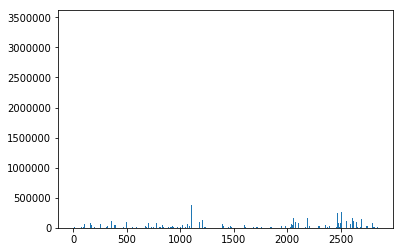

In [61]:
plt.bar(np.arange(0,len(y_test)), y_test)

<BarContainer object of 2847 artists>

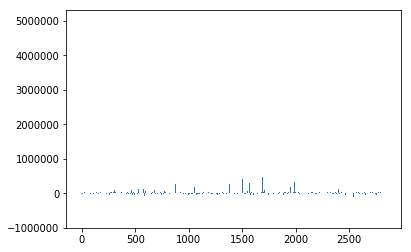

In [62]:
plt.bar(np.arange(0,len(prediction)), prediction)